In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import mne
from collections import defaultdict 

In [3]:
%matplotlib notebook

# Load Data from an Intan RHD file.
### Header information (and saved data, if present) will be stored in the *result* variable. You'll also be able to specify a channel's name to plot its recorded data as an example of accessing data from *result*.

In [2]:
# Load the background Python functions that allow for data loading and plotting
%run importrhdutilities.py

### Name of file to load. To load a different file, move it to the same directory as this notebook, and change the following 'filename' variable to point the name of your file.

In [35]:
metadata = pd.read_csv('./data/metadata.csv')

In [36]:
metadata

,Channel Number,Color of Cables,Coordinate,Region,Purpose
0,13,Yellow,ML-5.38 AP+1.16,S1ULp,"Should be right whiskers, error on drilling"
1,14,Orange,ML-2 AP2,Edge of FrA and cc,"Not designed for this, error on drilling"
2,16,Blue,ML-2 AP-1.5,S1HL,Right foot
3,17,Red,ML+3 AP+5,FrA,Possible Ref
4,19,Black,ML+5 AP-2.5,S1BF,Left whiskers


In [5]:
eeg_files = sorted(glob.glob('./data/**/*.rhd', recursive=True))

In [6]:
eeg_files

['./data/0121_experiment-20250203T183541Z-001/0121_experiment/intan_files/0121/001_250121_160632/001_250121_160632.rhd',
 './data/0121_experiment-20250203T183541Z-001/0121_experiment/intan_files/0121/002_250121_174234/002_250121_174234.rhd',
 './data/0121_experiment-20250203T183541Z-001/0121_experiment/intan_files/0121/003_250121_175015/003_250121_175015.rhd',
 './data/0121_experiment-20250203T183541Z-001/0121_experiment/intan_files/0121/005_250121_175739/005_250121_175739.rhd',
 './data/0121_experiment-20250203T183541Z-001/0121_experiment/intan_files/0121/007_250121_180605/007_250121_180605.rhd',
 './data/0121_experiment-20250203T183541Z-001/0121_experiment/intan_files/0121/008_250121_180703/008_250121_180703.rhd',
 './data/0121_experiment-20250203T183541Z-001/0121_experiment/intan_files/0121/009_250121_181000/009_250121_181000.rhd',
 './data/0121_experiment-20250203T183541Z-001/0121_experiment/intan_files/0121/012_250121_181646/012_250121_181646.rhd',
 './data/0121_experiment-2025020

- Loading in the data

In [47]:
index_to_data = defaultdict(dict)
# Looking at each file
for file_path in eeg_files:
    file_base = os.path.splitext(os.path.basename(file_path))[0]
    try:
        result, data_present = load_file(file_path)
        index_to_data[file_base]["loaded_file"] = result

        # all_channels = [(index, dictionary["native_channel_name"]) for index, dictionary in enumerate(result["amplifier_channels"])]
        all_channels = [dictionary["native_channel_name"] for dictionary in result["amplifier_channels"]]
        sampling_rate = result["frequency_parameters"]["amplifier_sample_rate"]
        
        info = mne.create_info(ch_names=all_channels, sfreq=sampling_rate, ch_types='eeg')
        raw = mne.io.RawArray(result["amplifier_data"], info)

    except:
        print(f"Error loading {file_path}")
    break


Reading Intan Technologies RHD Data File, Version 3.3

Found 7 amplifier channels.
Found 0 auxiliary input channels.
Found 0 supply voltage channels.
Found 0 board ADC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

File contains 4.975 seconds of data.  Amplifiers were sampled at 30.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 0.0 seconds


In [45]:
all_channels

[(0, 'A-013'),
 (1, 'A-014'),
 (2, 'A-015'),
 (3, 'A-016'),
 (4, 'A-017'),
 (5, 'A-018'),
 (6, 'A-019')]

In [38]:
result["t_amplifier"][-1]

np.float64(60.23676666666667)

In [46]:
result["amplifier_data"]

array([[-1686.555, -1664.325, -1639.755, ...,   -55.575,   -53.82 ,
          -56.745],
       [-1263.405, -1244.49 , -1220.7  , ...,  -159.705,  -162.825,
         -168.09 ],
       [-1664.715, -1640.535, -1611.87 , ...,  -294.645,  -298.545,
         -304.98 ],
       ...,
       [-1587.105, -1567.995, -1544.595, ...,  -157.365,  -163.995,
         -170.43 ],
       [-1798.29 , -1779.57 , -1752.66 , ...,  -100.425,  -101.4  ,
         -103.935],
       [-1736.475, -1714.05 , -1691.04 , ...,   -98.28 ,   -98.475,
          -99.45 ]], shape=(7, 149248))

0
A-000
1
A-013
2
A-014
3
A-015
4
A-016
5
A-017
6
A-018
7
A-019
8
A-020
9
A-021
10
A-022
11
A-023


In [ ]:
spike_triggers
{'voltage_trigger_mode': 1, 'voltage_threshold': -70, 'digital_trigger_channel': 0, 'digital_edge_polarity': 0}
amplifier_channels
{'port_name': 'Port A', 'port_prefix': 'A', 'port_number': 1, 'native_channel_name': 'A-013', 'custom_channel_name': 'A-013', 'native_order': 13, 'custom_order': 13, 'chip_channel': 13, 'board_stream': 0, 'electrode_impedance_magnitude': 0.0, 'electrode_impedance_phase': 0.0}

frequency_parameters
frequency_parameters
{'dsp_enabled': 1, 'actual_dsp_cutoff_frequency': 0.2914302945137024, 'actual_lower_bandwidth': 0.35791516304016113, 'actual_upper_bandwidth': 99.98820495605469, 'desired_dsp_cutoff_frequency': 0.2914302945137024, 'desired_lower_bandwidth': 0.35101354122161865, 'desired_upper_bandwidth': 100.0, 'notch_filter_frequency': 60, 'desired_impedance_test_frequency': 1000.0, 'actual_impedance_test_frequency': 0.0, 'amplifier_sample_rate': 30000.0, 'aux_input_sample_rate': 7500.0, 'supply_voltage_sample_rate': 234.375, 'board_adc_sample_rate': 30000.0, 'board_dig_in_sample_rate': 30000.0}

t_amplifier
0.0
amplifier_data
[ 78.     76.245  74.49  ... -39.585 -38.805 -38.61 ]

In [33]:
index_to_data["001_250121_160632"]["amplifier_data"]

array([[-1686.555, -1664.325, -1639.755, ...,   -55.575,   -53.82 ,
          -56.745],
       [-1263.405, -1244.49 , -1220.7  , ...,  -159.705,  -162.825,
         -168.09 ],
       [-1664.715, -1640.535, -1611.87 , ...,  -294.645,  -298.545,
         -304.98 ],
       ...,
       [-1587.105, -1567.995, -1544.595, ...,  -157.365,  -163.995,
         -170.43 ],
       [-1798.29 , -1779.57 , -1752.66 , ...,  -100.425,  -101.4  ,
         -103.935],
       [-1736.475, -1714.05 , -1691.04 , ...,   -98.28 ,   -98.475,
          -99.45 ]], shape=(7, 149248))

In [25]:
file_base

('013_250121_182953', '.rhd')

In [7]:
filename = 'sampledata.rhd' # Change this variable to load a different data file
result, data_present = load_file(eeg_files[5])


Reading Intan Technologies RHD Data File, Version 3.3

Found 7 amplifier channels.
Found 0 auxiliary input channels.
Found 0 supply voltage channels.
Found 0 board ADC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

File contains 101.709 seconds of data.  Amplifiers were sampled at 30.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 0.6 seconds


### Once a file is loaded, all of its information is stored in the *result* variable. If further analysis of recorded data is desired, this is the variable that should be used.

In [8]:
print_all_channel_names(result) # Uncomment this line and re-run cell to display names of all available channels

A-013
A-014
A-015
A-016
A-017
A-018
A-019


In [17]:
result.keys()

dict_keys(['spike_triggers', 'amplifier_channels', 'notes', 'frequency_parameters', 'reference_channel', 't_amplifier', 'amplifier_data'])

In [23]:
for key in result.keys():
    try:
        print(key)
        print(result[key][0])
    except:
        print(key)
        print(result[key])

spike_triggers
{'voltage_trigger_mode': 1, 'voltage_threshold': -70, 'digital_trigger_channel': 0, 'digital_edge_polarity': 0}
amplifier_channels
{'port_name': 'Port A', 'port_prefix': 'A', 'port_number': 1, 'native_channel_name': 'A-013', 'custom_channel_name': 'A-013', 'native_order': 13, 'custom_order': 13, 'chip_channel': 13, 'board_stream': 0, 'electrode_impedance_magnitude': 0.0, 'electrode_impedance_phase': 0.0}
notes
notes
{'note1': '', 'note2': '', 'note3': ''}
frequency_parameters
frequency_parameters
{'dsp_enabled': 1, 'actual_dsp_cutoff_frequency': 0.2914302945137024, 'actual_lower_bandwidth': 0.35791516304016113, 'actual_upper_bandwidth': 99.98820495605469, 'desired_dsp_cutoff_frequency': 0.2914302945137024, 'desired_lower_bandwidth': 0.35101354122161865, 'desired_upper_bandwidth': 100.0, 'notch_filter_frequency': 60, 'desired_impedance_test_frequency': 1000.0, 'actual_impedance_test_frequency': 0.0, 'amplifier_sample_rate': 30000.0, 'aux_input_sample_rate': 7500.0, 'suppl

In [ ]:
# index_to_mne = {}
# for index, df in all_eeg_df:
#     # Converting dataframe to Numpy array
#     eeg_data = df.drop(columns=['Second'], errors='ignore').to_numpy().T  # Transpose to shape (n_channels, n_samples)   

#     # Removing first 5 seconds and last 5 seconds of data
#     # eeg_data = eeg_data[:, sampling_rate * 10: -sampling_rate * 10]

#     # channel_names = df.columns[1:]
#     channel_names = ["C3", "C4"]

#     info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types='eeg')
#     raw = mne.io.RawArray(eeg_data, info)
    
#     # raw.apply_function(lambda x: x * 1e-5)

#     # Load a standard montage
#     montage = mne.channels.make_standard_montage('standard_1020')

#     # Apply the montage to the raw object
#     raw.set_montage(montage)

#     # fig = raw.plot(scalings='auto', title=f"Raw Signal - {index}", start=start, duration=duration);
#     # fig = raw.plot(scalings=dict(eeg=scaling), title=f"Raw Signal - {index}", start=start, duration=duration);

#     # fig.suptitle(f"Raw Signal - {index}", fontsize=16)  # Add a title
#     # fig.savefig(f"./plots/raw_signal_{index}.png")

#     fig = raw.compute_psd(fmin=2, fmax=60, ).plot(average=False, spatial_colors=True, );
#     fig.savefig(f"./plots/raw_power_{index}.png")


#     ## Preprocessing

#     # set notch filter to remove electrical noise
#     raw.notch_filter(60)
#     # only keeping frequencies between 1-50 Hz
#     raw.filter(l_freq=fmin, h_freq=fmax, method="fir", fir_design="firwin", pad="reflect_limited") 
    
#     # Downsample a lot
#     raw.resample(128, npad='auto')

#     raw = raw.crop(tmin=5, tmax=65)

#     # Extract data for specific channels (e.g., the first 2 channels)
#     data = raw.get_data()  # Shape: (len(channels), n_times)
#     times = raw.times  # Time points in seconds

#     # Normalize the data
#     normalized_data = data / np.sqrt(np.nanmedian(data**2, axis=1, keepdims=True)).astype(np.float32)
#     raw._data = normalized_data  # Overwrite data in MNE object

#     # Plot each channel
#     fig, ax1 = plt.subplots(figsize=(16, 8))
#     ax2 = ax1.twinx()
#     ax1.plot(times + 5, raw._data[0], 'orange')
#     ax2.plot(times + 5, raw._data[1], 'blue')

#     ax1.set_xlabel('X data')
#     ax1.set_ylabel('Y1 data', color='g')
#     ax2.set_ylabel('Y2 data', color='b')


#     current_time = wait_duration
#     action_segments = []

#     while current_time < times[-1]:
#         # action_segments.append((current_time, current_time + stir_duration))
#         plt.axvspan(current_time, current_time + stir_duration, color='orange', alpha=0.3)
#         current_time += stir_duration + rest_duration


#     # plt.title("EEG Signal")
#     # plt.xlabel("Time (s)")
#     # plt.ylabel("Amplitude (µV)")
#     plt.legend()
#     plt.grid(True)
#     plt.savefig(f"./plots/filtered_signal_{index}.png")

#     # fig = raw.plot(scalings='auto', title=f"Raw Signal - {index}", start=start, duration=duration);
#     # fig = raw.plot(scalings=dict(eeg=scaling), title=f"Raw Signal - {index}", start=start, duration=duration);
#     # fig.suptitle(f"Filtered Signal - {index}", fontsize=16)  # Add a title
#     # fig.savefig(f"./plots/filtered_signal_{index}.png")

#     fig = raw.compute_psd(fmin=fmin, fmax=fmax, ).plot(average=False, spatial_colors=True, );
#     fig.savefig(f"./plots/filtered_power_{index}.png")

#     # set up and fit the ICA
#     ica = mne.preprocessing.ICA(n_components=2, method='fastica')
#     ica.fit(raw)
#     # ica.exclude = [1, 2]  # details on how we picked these are omitted here
#     fig = ica.plot_properties(raw)[0]
#     fig.savefig(f"./plots/ica0_{index}.png")

#     fig = ica.plot_properties(raw)[1]
#     fig.savefig(f"./plots/ica1_{index}.png")

#     index_to_mne[index] = raw



In [19]:
result["amplifier_channels"][0]

{'port_name': 'Port A',
 'port_prefix': 'A',
 'port_number': 1,
 'native_channel_name': 'A-013',
 'custom_channel_name': 'A-013',
 'native_order': 13,
 'custom_order': 13,
 'chip_channel': 13,
 'board_stream': 0,
 'electrode_impedance_magnitude': 0.0,
 'electrode_impedance_phase': 0.0}

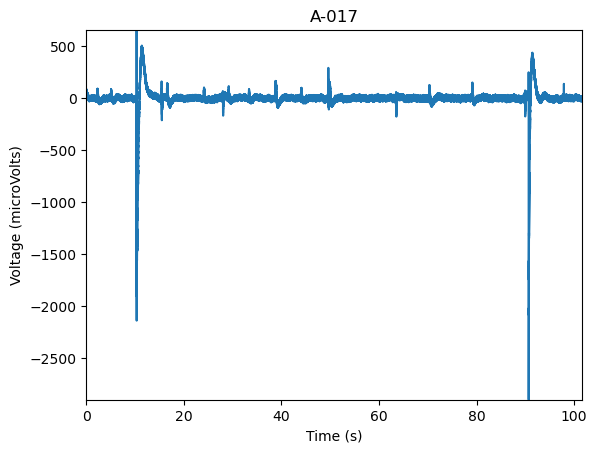

In [14]:
channel_name = 'A-017' # Change this variable and re-run cell to plot a different channel

%matplotlib inline

if data_present:
    plot_channel(channel_name, result)
    
else:
    print('Plotting not possible; no data in this file')